In [16]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [17]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [18]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [19]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## iPhone14Pro_I Own Models

## iPhone14Pro_I(i) dataset

In [5]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone14-Pro/iPhone14_pro_I(i)/"

    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[0.       +0.j        0.0234375+0.0078125j 0.0234375+0.j        ...
 0.0078125+0.015625j  0.       +0.0078125j 0.0078125+0.015625j ]
2048
75121
(2048, 75121)
[0.01839223 0.00957888 0.00355077 ... 0.00201986 0.00381509 0.00977977]
0
(10000, 2048)
(10000,)
[0.0234375+0.015625j  0.0078125-0.015625j  0.03125  +0.0078125j ...
 0.       -0.0078125j 0.015625 +0.j        0.015625 +0.015625j ]
2048
90700
(2048, 90700)
[0.0186928  0.00969831 0.00361431 ... 0.00185373 0.00362271 0.00991047]
1
(20000, 2048)
(20000,)
[0.0078125+0.j        0.03125  +0.j        0.       +0.0078125j ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375-0.0078125j]
2048
73583
(2048, 73583)
[0.01858141 0.00973842 0.00332524 ... 0.00217969 0.0040196  0.00976847]
2
(30000, 2048)
(30000,)
[0.0234375+0.0078125j 0.015625 +0.0078125j 0.015625 -0.0078125j ...
 0.0078125+0.j        0.0078125+0.015625j  0.03125  +0.j       ]
2048
87852
(2048, 87852)
[0.01946594 0.0098984  0.00382288 ... 0.00209648 0.00400435 0.00991102]
3
(40

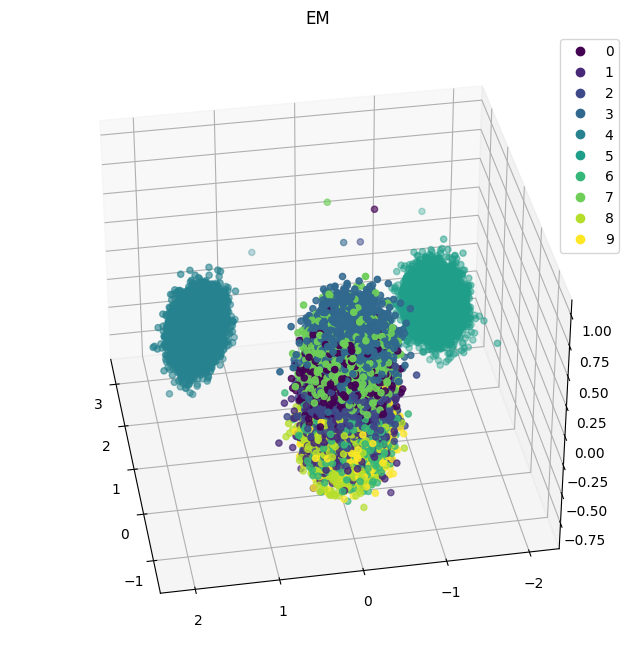

In [6]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/i14Pro_I(i)_scatter.pdf')

In [7]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

2023-02-15 14:35:29.697909: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(i)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 29s 11ms/step - loss: 2.2584 - accuracy: 0.2023 - val_loss: 2.1809 - val_accuracy: 0.3528
Epoch 2/30
2532/2532 [==============================] - 25s 10ms/step - loss: 1.9085 - accuracy: 0.4295 - val_loss: 1.6429 - val_accuracy: 0.5203
Epoch 3/30
2532/2532 [==============================] - 28s 11ms/step - loss: 1.4864 - accuracy: 0.6110 - val_loss: 1.3561 - val_accuracy: 0.6034
Epoch 4/30
2532/2532 [==============================] - 36s 14ms/step - loss: 1.0020 - accuracy: 0.8054 - val_loss: 0.6814 - val_accuracy: 0.8636
Epoch 5/30
2532/2532 [==============================] - 28s 11ms/step - loss: 0.4234 - accuracy: 0.9219 - val_loss: 0.2696 - val_accuracy: 0.9526
Epoch 6/30
2532/2532 [==============================] - 26s 10ms/step - loss: 0.1879 - accuracy: 0.9639 - val_loss: 0.1422 - val_accuracy: 0.9716
Epoch 7/30
2532/2532 [==============================] - 26s 10ms/step - loss: 0.1035 - accuracy: 0.9807 - val_loss: 0.2036 -

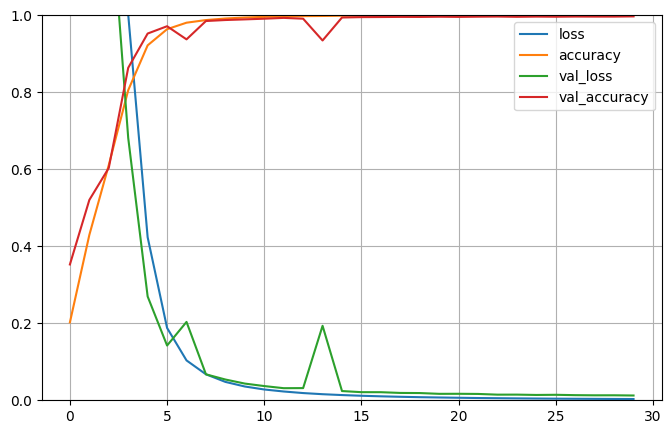

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/accuracy_and_loss_iPhone14Pro_I.pdf')

In [11]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(i)_model.h5")

In [12]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0120 - accuracy: 0.9962
test loss, test acc: [0.01196079608052969, 0.9962000250816345]


In [13]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1006    0    0    1    0    0    0    2    2    0]
 [   0 1003    0    1    0    0    1    0    1    4]
 [   0    1  991    1    0    0    0    0    0    0]
 [   2    0    4  932    0    0    0    1    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    3    1    0    0  992    1    1    1]
 [   1    1    0    1    0    0    0  971    0    0]
 [   1    0    1    0    0    0    1    0  999    1]
 [   0    0    1    0    0    1    0    1    0  998]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      0.99      1.00      1010
           2       0.99      1.00      0.99       993
           3       0.99      0.99      0.99       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      0.99      1.00       999
           7       0.99      1.00   

Test Accuracy:0.9962


Text(0.5, 1.0, 'Accuracy:0.996')

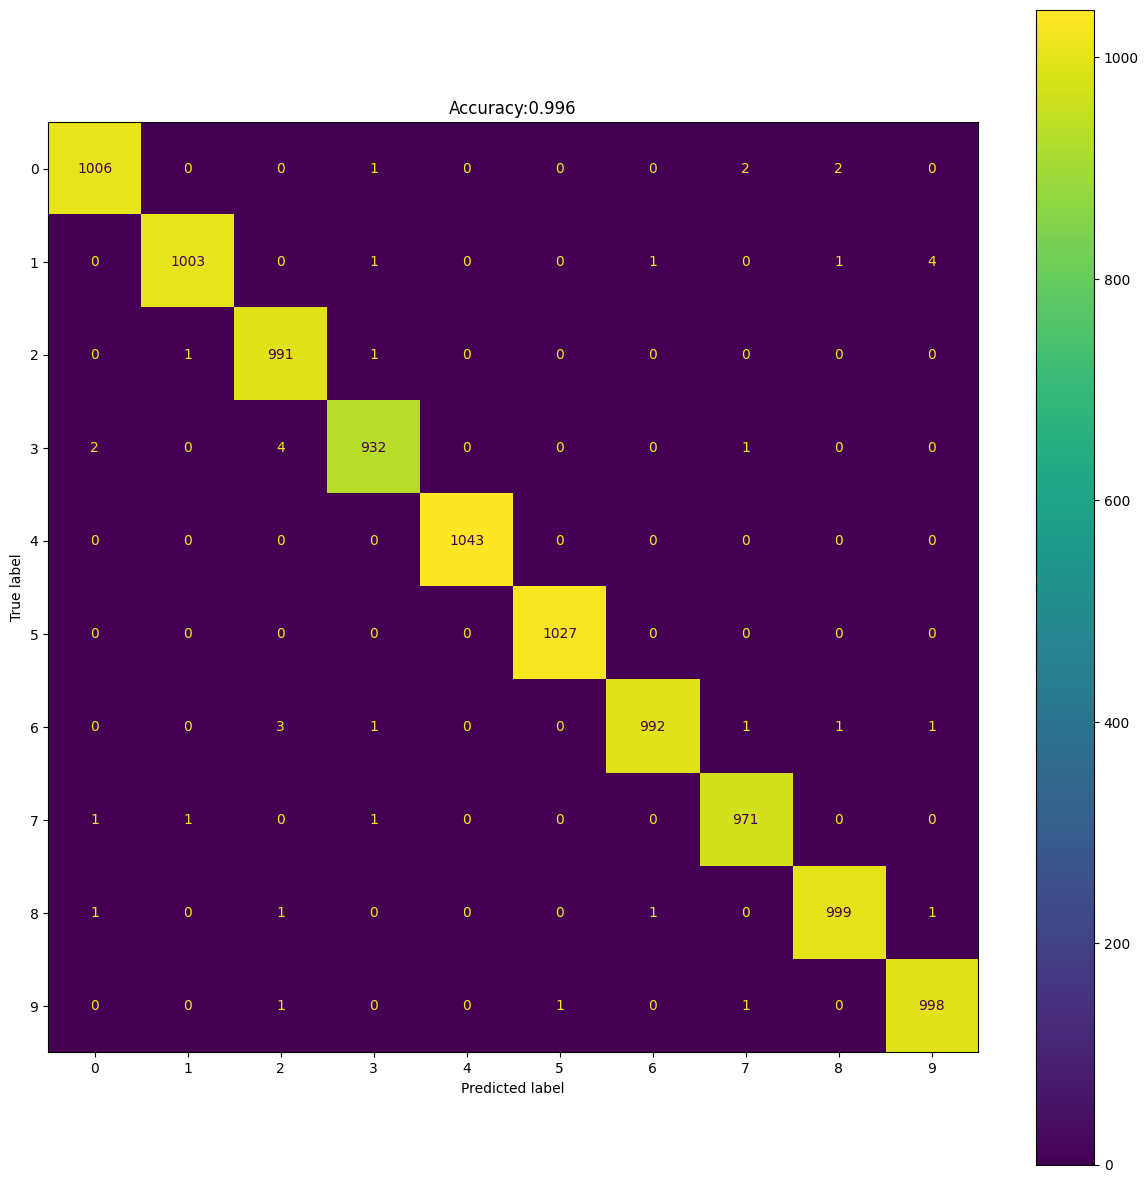

In [15]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_I_confusion_matrix.pdf')

## iPhone14Pro_I(ii) dataset

In [20]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone14Pro_I_Validate/iPhone14_pro_I(ii)/"

    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[0.0078125+0.0078125j 0.03125  -0.0078125j 0.015625 +0.0078125j ...
 0.015625 +0.015625j  0.015625 +0.j        0.03125  -0.0078125j]
2048
84337
(2048, 84337)
[0.02120258 0.01093484 0.00379057 ... 0.00193539 0.0039011  0.01052333]
0
(10000, 2048)
(10000,)
[0.015625 +0.j        0.0234375+0.0078125j 0.0078125+0.j        ...
 0.0078125-0.0078125j 0.0234375+0.015625j  0.015625 +0.0078125j]
2048
83238
(2048, 83238)
[0.01855624 0.00968533 0.00359719 ... 0.00189885 0.00373283 0.00970302]
1
(20000, 2048)
(20000,)
[0.015625 +0.0078125j 0.015625 +0.0078125j 0.       +0.0078125j ...
 0.0234375+0.0078125j 0.015625 +0.0078125j 0.015625 +0.015625j ]
2048
80509
(2048, 80509)
[0.01902401 0.0098836  0.00327027 ... 0.00165634 0.00325221 0.00979596]
2
(30000, 2048)
(30000,)
[0.       +0.0078125j 0.03125  +0.j        0.015625 +0.03125j   ...
 0.015625 -0.0078125j 0.0234375+0.015625j  0.0078125+0.j       ]
2048
85214
(2048, 85214)
[0.01858882 0.00984553 0.00361264 ... 0.00206463 0.00381185 0.00977849]
3
(40

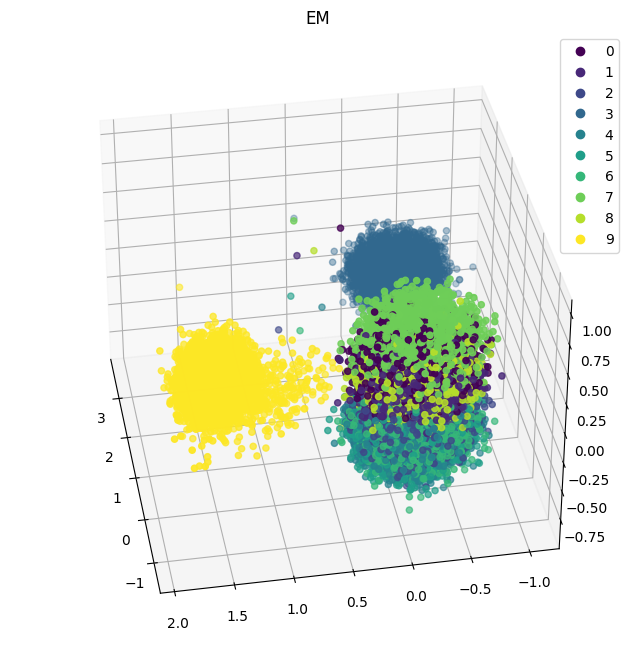

In [21]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/i14Pro_I(ii)_scatter.pdf')

In [22]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [24]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(ii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 27s 11ms/step - loss: 2.1714 - accuracy: 0.2504 - val_loss: 1.9627 - val_accuracy: 0.3596
Epoch 2/30
2532/2532 [==============================] - 30s 12ms/step - loss: 1.7642 - accuracy: 0.4638 - val_loss: 1.5621 - val_accuracy: 0.5714
Epoch 3/30
2532/2532 [==============================] - 31s 12ms/step - loss: 1.3708 - accuracy: 0.6453 - val_loss: 1.1679 - val_accuracy: 0.6388
Epoch 4/30
2532/2532 [==============================] - 30s 12ms/step - loss: 0.8041 - accuracy: 0.8431 - val_loss: 0.5216 - val_accuracy: 0.8998
Epoch 5/30
2532/2532 [==============================] - 31s 12ms/step - loss: 0.3433 - accuracy: 0.9397 - val_loss: 0.2276 - val_accuracy: 0.9588
Epoch 6/30
2532/2532 [==============================] - 28s 11ms/step - loss: 0.1601 - accuracy: 0.9724 - val_loss: 0.1284 - val_accuracy: 0.9759
Epoch 7/30
2532/2532 [==============================] - 26s 10ms/step - loss: 0.0927 - accuracy: 0.9842 - val_loss: 0.0752 -

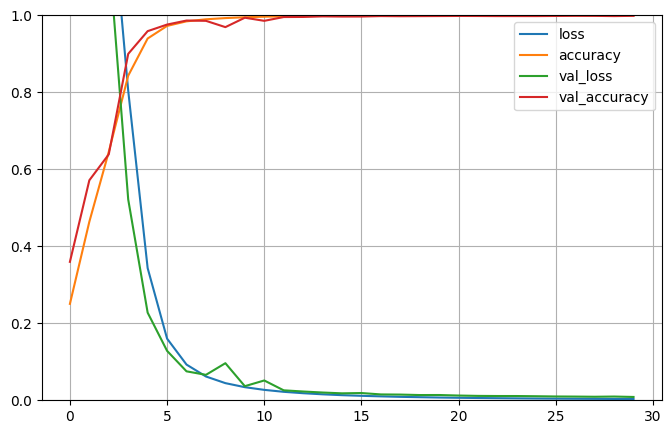

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(ii)_model.h5")

In [27]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 3s 5ms/step - loss: 0.0109 - accuracy: 0.9975
test loss, test acc: [0.010888953693211079, 0.9975000023841858]


In [28]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 6ms/step
[0 6 5 ... 5 5 6]
0


In [29]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1007    1    0    0    0    0    2    0    1    0]
 [   0 1006    1    0    0    1    0    0    2    0]
 [   0    0  991    0    1    0    1    0    0    0]
 [   0    0    0  937    0    0    1    0    1    0]
 [   0    0    0    0 1041    1    0    0    1    0]
 [   0    0    0    0    1 1023    3    0    0    0]
 [   1    0    1    0    0    2  995    0    0    0]
 [   0    1    0    0    0    0    0  973    0    0]
 [   1    1    0    0    0    0    0    0 1001    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       0.99      1.00      0.99       999
           7       1.00      1.00   

Test Accuracy:0.9975


Text(0.5, 1.0, 'Accuracy:0.998')

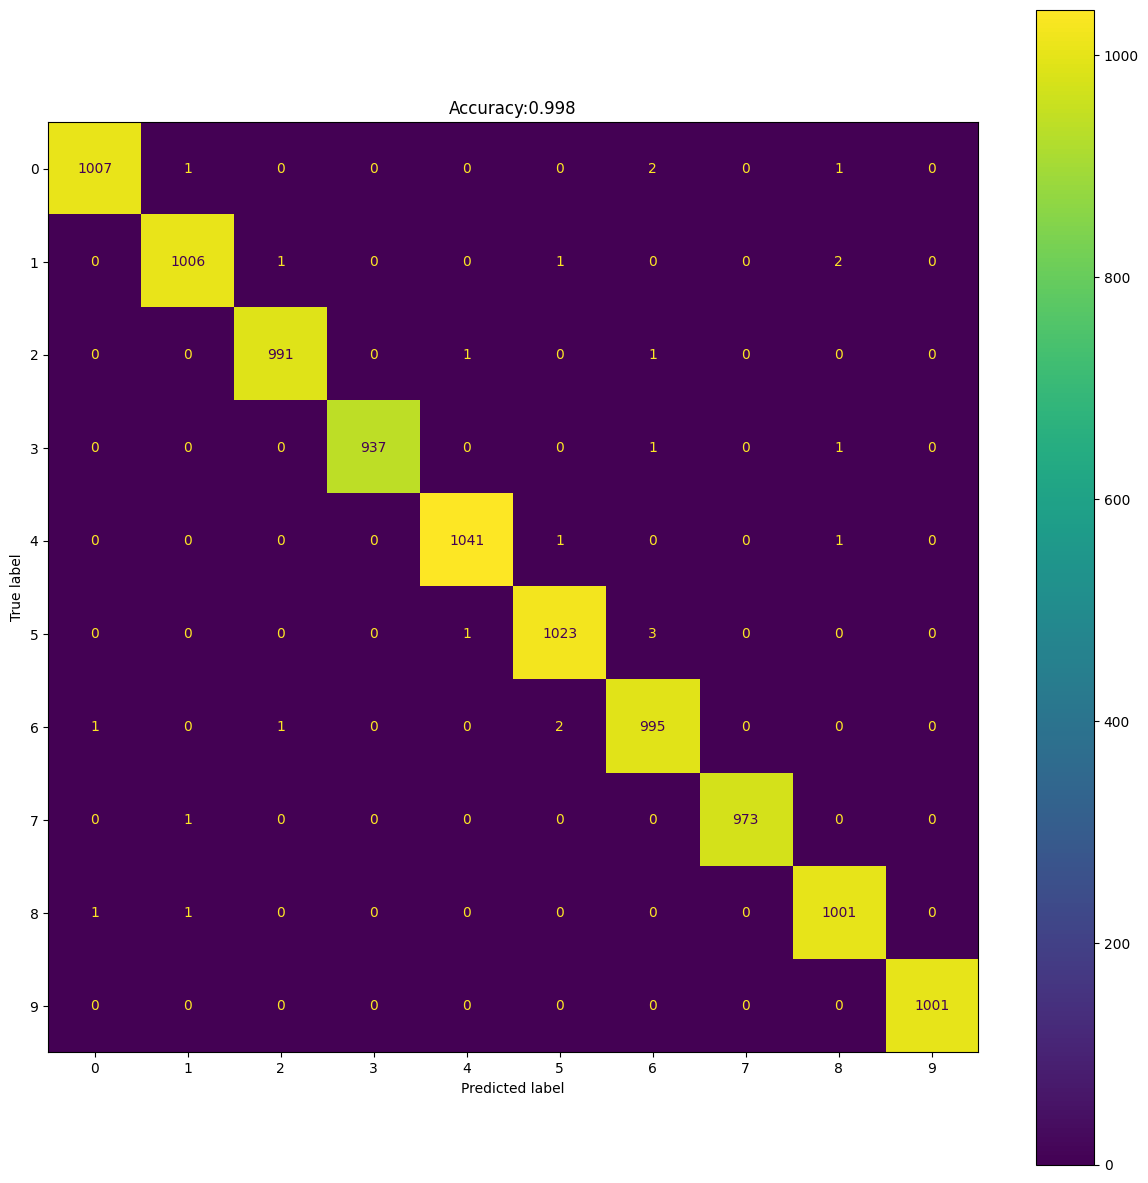

In [30]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(iii) dataset

In [35]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone14Pro_I_Validate/iPhone14Pro_I_(iii)/"

    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[0.015625 +0.015625j  0.0234375+0.0078125j 0.0078125+0.0078125j ...
 0.015625 +0.j        0.0078125+0.j        0.015625 +0.0234375j]
2048
83970
(2048, 83970)
[0.01894874 0.00992928 0.00377109 ... 0.00194094 0.00372722 0.00976472]
0
(10000, 2048)
(10000,)
[0.015625 +0.0078125j 0.0078125+0.015625j  0.0078125+0.015625j  ...
 0.015625 +0.015625j  0.0234375+0.015625j  0.0390625+0.015625j ]
2048
79947
(2048, 79947)
[0.01901123 0.00982715 0.00341399 ... 0.00167948 0.00337034 0.00989594]
1
(20000, 2048)
(20000,)
[0.0234375+0.j        0.03125  +0.0234375j 0.015625 +0.0078125j ...
 0.0078125+0.j        0.0078125+0.015625j  0.0078125+0.0078125j]
2048
82216
(2048, 82216)
[0.01885769 0.00983789 0.00367951 ... 0.00190936 0.00359154 0.00990023]
2
(30000, 2048)
(30000,)
[0.03125  +0.015625j  0.0234375-0.0078125j 0.0078125+0.0234375j ...
 0.0078125+0.015625j  0.0234375-0.0078125j 0.0078125+0.03125j  ]
2048
80825
(2048, 80825)
[0.0188336  0.00983761 0.00379523 ... 0.00184483 0.00339455 0.0098141 ]
3
(40

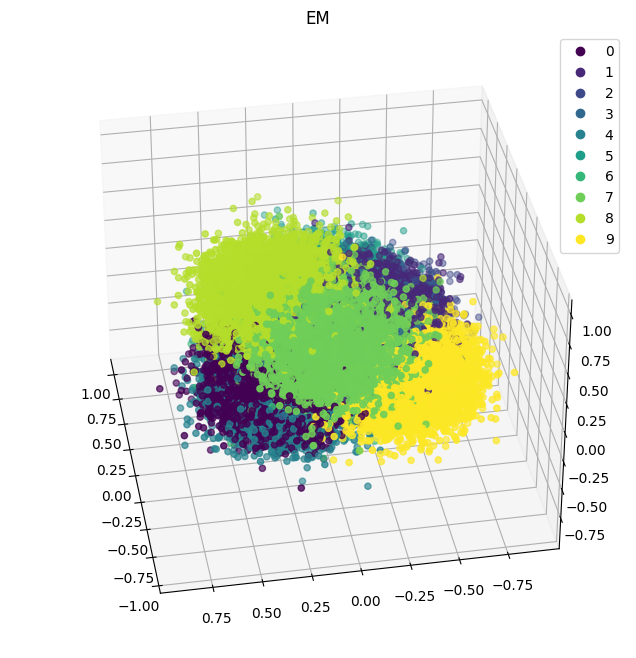

In [36]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/i14Pro_I(iii)_scatter.pdf')

In [37]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [39]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(iii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 47s 18ms/step - loss: 2.2862 - accuracy: 0.1621 - val_loss: 2.2637 - val_accuracy: 0.2369
Epoch 2/30
2532/2532 [==============================] - 39s 15ms/step - loss: 2.2186 - accuracy: 0.3182 - val_loss: 2.1596 - val_accuracy: 0.3536
Epoch 3/30
2532/2532 [==============================] - 42s 17ms/step - loss: 2.0162 - accuracy: 0.5299 - val_loss: 1.8449 - val_accuracy: 0.5354
Epoch 4/30
2532/2532 [==============================] - 35s 14ms/step - loss: 1.4236 - accuracy: 0.7340 - val_loss: 1.0715 - val_accuracy: 0.7502
Epoch 5/30
2532/2532 [==============================] - 37s 15ms/step - loss: 0.6500 - accuracy: 0.8849 - val_loss: 0.5025 - val_accuracy: 0.8727
Epoch 6/30
2532/2532 [==============================] - 28s 11ms/step - loss: 0.2709 - accuracy: 0.9499 - val_loss: 0.1930 - val_accuracy: 0.9612
Epoch 7/30
2532/2532 [==============================] - 25s 10ms/step - loss: 0.1437 - accuracy: 0.9737 - val_loss: 0.2275 -

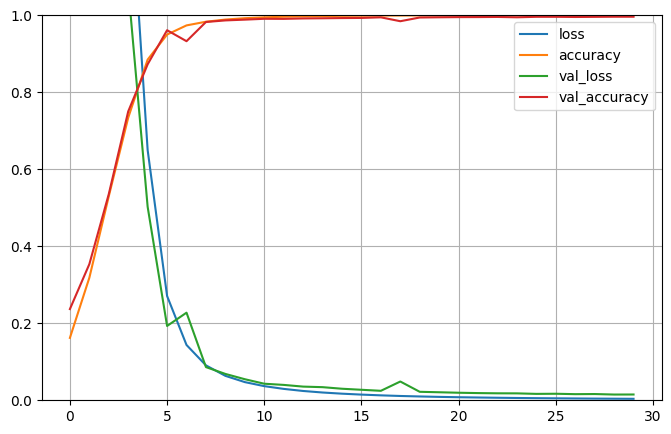

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [41]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(iii)_model.h5")

In [42]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0192 - accuracy: 0.9942
test loss, test acc: [0.019221721217036247, 0.9941999912261963]


In [43]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [44]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1006    1    0    1    1    0    1    0    0    1]
 [   0 1005    1    0    1    2    0    0    0    1]
 [   0    0  987    0    2    0    2    0    2    0]
 [   0    0    0  934    2    1    0    0    2    0]
 [   1    0    1    2 1034    2    0    1    1    1]
 [   0    1    1    1    0 1019    4    1    0    0]
 [   2    0    0    0    0    5  992    0    0    0]
 [   1    1    1    0    0    0    1  970    0    0]
 [   2    2    1    0    0    1    0    1  996    0]
 [   0    0    1    1    0    0    0    0    0  999]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1011
           1       1.00      1.00      1.00      1010
           2       0.99      0.99      0.99       993
           3       0.99      0.99      0.99       939
           4       0.99      0.99      0.99      1043
           5       0.99      0.99      0.99      1027
           6       0.99      0.99      0.99       999
           7       1.00      1.00   

Test Accuracy:0.9942


Text(0.5, 1.0, 'Accuracy:0.994')

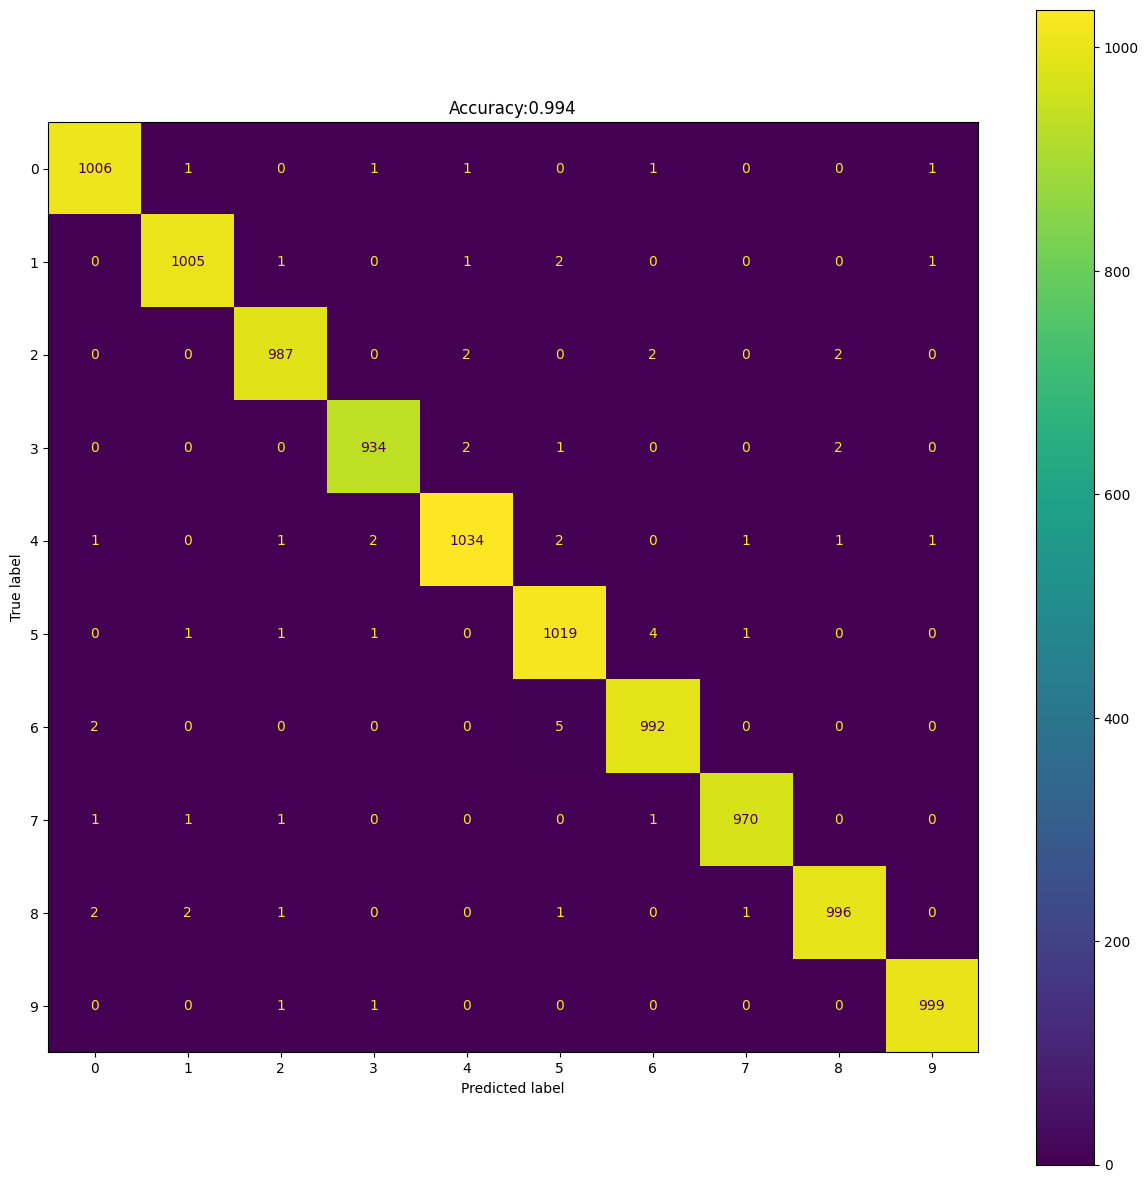

In [45]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(iv) dataset

In [5]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone14Pro_I_Validate/iPhone14Pro_I(iv)/"

    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[0.015625 +0.0078125j 0.0234375+0.j        0.015625 +0.015625j  ...
 0.0234375+0.0078125j 0.       +0.j        0.0234375+0.0078125j]
2048
77828
(2048, 77828)
[0.01934693 0.00994371 0.00324411 ... 0.00216142 0.00433003 0.00997052]
0
(10000, 2048)
(10000,)
[0.015625 +0.0078125j 0.0078125+0.j        0.0078125-0.0078125j ...
 0.015625 +0.015625j  0.0078125+0.j        0.0234375+0.j       ]
2048
83312
(2048, 83312)
[0.01869232 0.00979125 0.00402684 ... 0.00165137 0.00374471 0.00973141]
1
(20000, 2048)
(20000,)
[0.0078125+0.015625j  0.03125  +0.015625j  0.0078125-0.0078125j ...
 0.015625 +0.0078125j 0.015625 -0.0078125j 0.       -0.0078125j]
2048
71024
(2048, 71024)
[0.0186828  0.00980125 0.00405719 ... 0.00174633 0.00372244 0.00980975]
2
(30000, 2048)
(30000,)
[0.03125  +0.015625j  0.015625 +0.0078125j 0.03125  -0.0078125j ...
 0.015625 +0.0078125j 0.0234375+0.j        0.015625 -0.015625j ]
2048
85653
(2048, 85653)
[0.0187249  0.00987723 0.00351864 ... 0.00193076 0.00375279 0.00974119]
3
(40

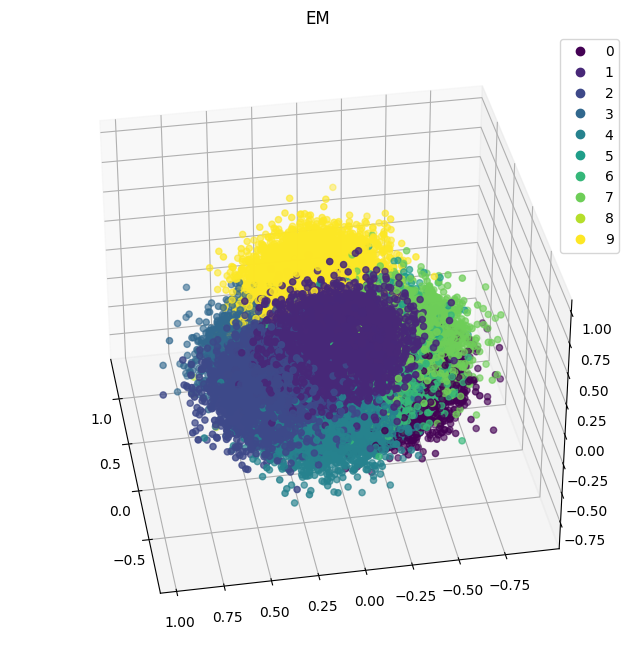

In [6]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/i14Pro_I(iv)_scatter.pdf')

In [7]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

2023-02-16 12:01:45.859503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(iv)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 32s 12ms/step - loss: 2.2910 - accuracy: 0.1345 - val_loss: 2.2743 - val_accuracy: 0.2021
Epoch 2/30
2532/2532 [==============================] - 32s 12ms/step - loss: 2.2464 - accuracy: 0.2547 - val_loss: 2.2077 - val_accuracy: 0.3522
Epoch 3/30
2532/2532 [==============================] - 33s 13ms/step - loss: 2.1246 - accuracy: 0.4573 - val_loss: 2.0078 - val_accuracy: 0.5388
Epoch 4/30
2532/2532 [==============================] - 32s 13ms/step - loss: 1.7049 - accuracy: 0.6688 - val_loss: 1.3048 - val_accuracy: 0.7686
Epoch 5/30
2532/2532 [==============================] - 31s 12ms/step - loss: 0.8771 - accuracy: 0.8265 - val_loss: 0.5739 - val_accuracy: 0.8717
Epoch 6/30
2532/2532 [==============================] - 28s 11ms/step - loss: 0.3780 - accuracy: 0.9169 - val_loss: 0.3031 - val_accuracy: 0.9231
Epoch 7/30
2532/2532 [==============================] - 31s 12ms/step - loss: 0.1968 - accuracy: 0.9563 - val_loss: 0.6371 -

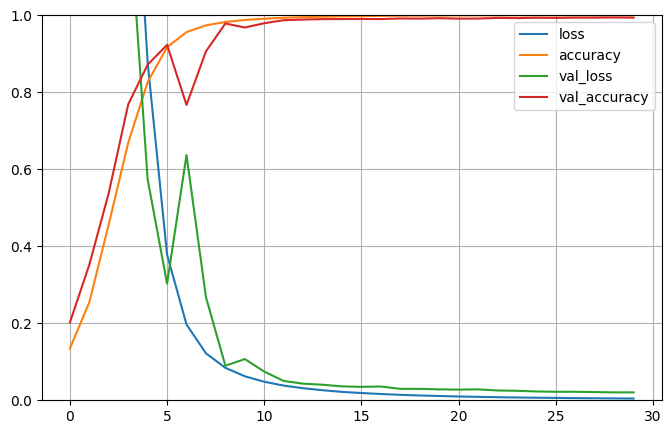

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(iv)_model.h5")

In [12]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0222 - accuracy: 0.9927
test loss, test acc: [0.022203225642442703, 0.9926999807357788]


In [13]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[0 6 5 ... 5 5 6]
0


In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1003    1    2    0    0    0    1    4    0    0]
 [   0 1003    1    0    1    0    3    2    0    0]
 [   5    2  984    2    0    0    0    0    0    0]
 [   0    0    1  937    1    0    0    0    0    0]
 [   0    1    2    0 1036    0    1    1    1    1]
 [   0    0    0    3    0 1018    3    2    0    1]
 [   0    2    1    0    0    2  993    1    0    0]
 [   3    2    0    0    2    2    0  964    0    1]
 [   0    0    4    2    1    0    1    0  992    3]
 [   1    0    0    1    0    0    0    1    1  997]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1011
           1       0.99      0.99      0.99      1010
           2       0.99      0.99      0.99       993
           3       0.99      1.00      0.99       939
           4       1.00      0.99      0.99      1043
           5       1.00      0.99      0.99      1027
           6       0.99      0.99      0.99       999
           7       0.99      0.99   

Test Accuracy:0.9927


Text(0.5, 1.0, 'Accuracy:0.993')

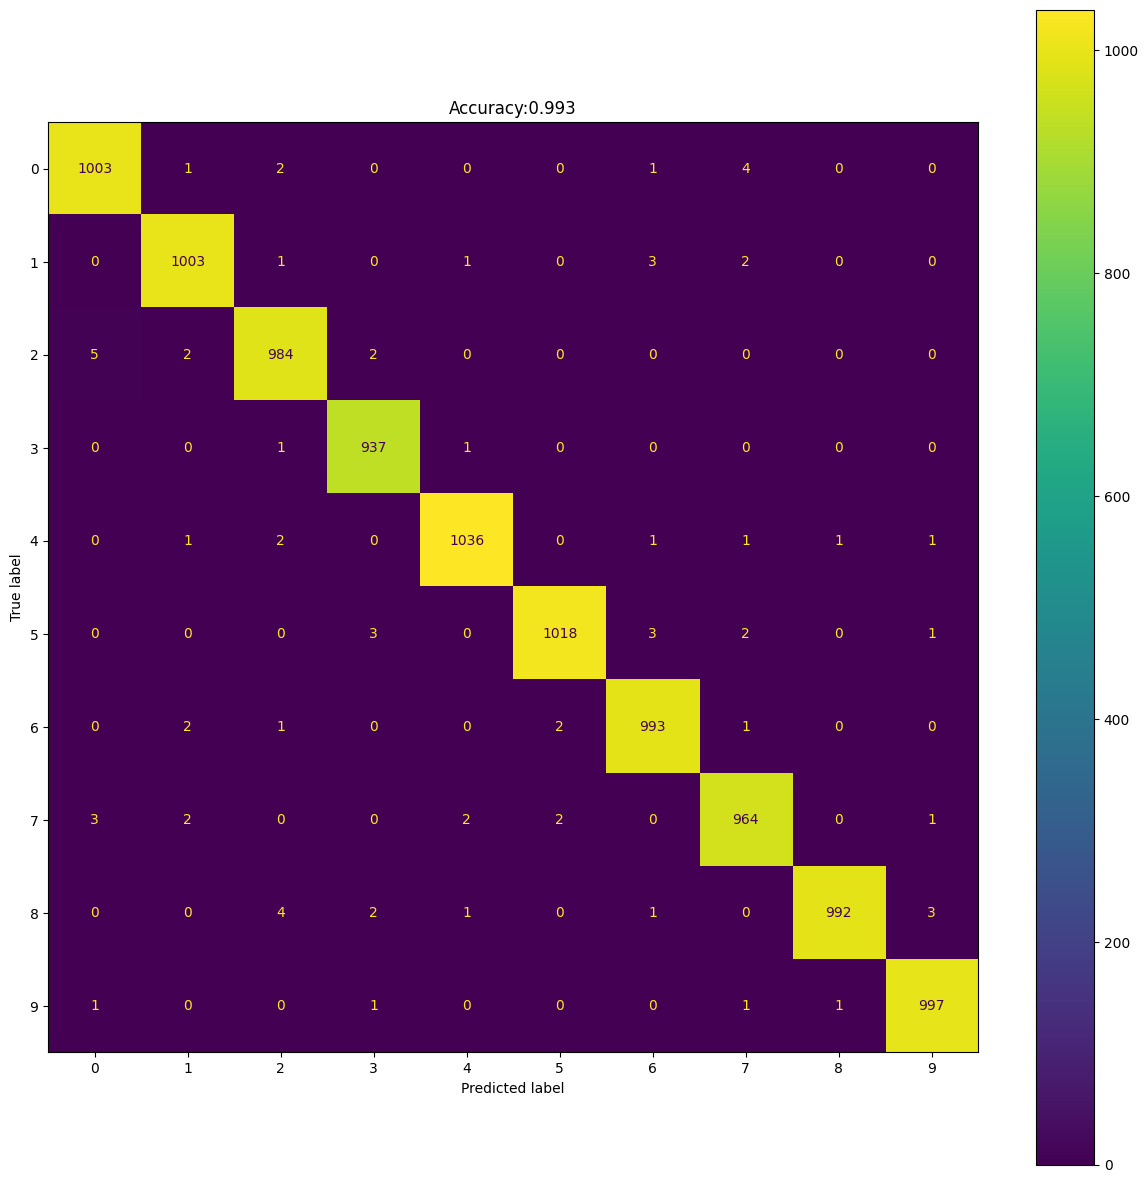

In [15]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_I_confusion_matrix.pdf')

## iPhone14Pro_I(v) dataset

In [20]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone14Pro_I_Validate/iPhone14Pro_I(v)/"

    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/i8_I.csv', header=False)

[0.0078125+0.015625j  0.015625 +0.0078125j 0.015625 -0.0078125j ...
 0.0234375+0.0078125j 0.03125  +0.0078125j 0.015625 +0.0078125j]
2048
81192
(2048, 81192)
[0.01867803 0.00976685 0.00376288 ... 0.00200002 0.00394439 0.00999402]
0
(10000, 2048)
(10000,)
[0.       +0.0078125j 0.0234375+0.j        0.03125  +0.j        ...
 0.0234375+0.j        0.0234375+0.0234375j 0.0078125+0.j       ]
2048
91139
(2048, 91139)
[0.01848593 0.00978156 0.00328117 ... 0.00211466 0.00385599 0.00974472]
1
(20000, 2048)
(20000,)
[-0.0078125+0.015625j   0.0234375+0.j         0.03125  +0.j        ...
  0.015625 +0.0078125j  0.015625 +0.0078125j  0.015625 -0.0078125j]
2048
88359
(2048, 88359)
[0.01869777 0.00970068 0.00339714 ... 0.00201213 0.00373061 0.00970339]
2
(30000, 2048)
(30000,)
[0.015625 +0.0078125j 0.015625 +0.0234375j 0.015625 +0.015625j  ...
 0.015625 -0.0078125j 0.015625 +0.015625j  0.0234375+0.0078125j]
2048
90187
(2048, 90187)
[0.01943404 0.01073077 0.0038433  ... 0.00181564 0.0036553  0.01024228]

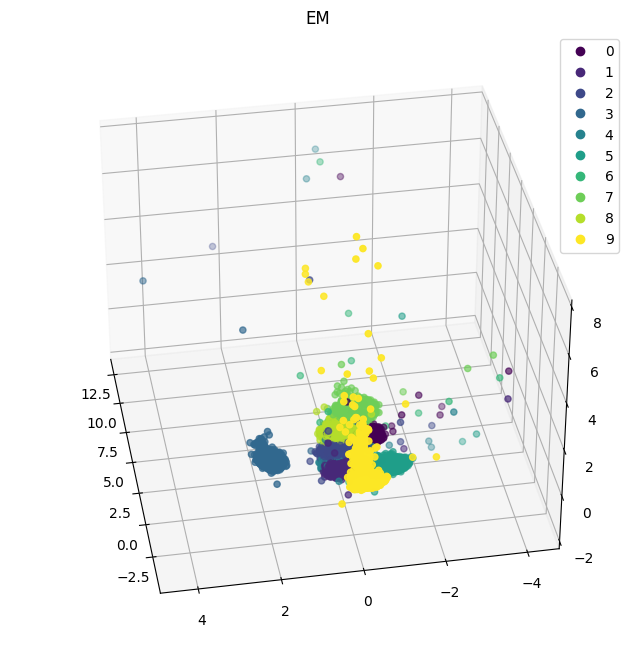

In [21]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/i14Pro_I(v)_scatter.pdf')

In [22]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [24]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(v)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 31s 12ms/step - loss: 2.1225 - accuracy: 0.4087 - val_loss: 1.7549 - val_accuracy: 0.7496
Epoch 2/30
2532/2532 [==============================] - 33s 13ms/step - loss: 1.0384 - accuracy: 0.9301 - val_loss: 0.4305 - val_accuracy: 0.9783
Epoch 3/30
2532/2532 [==============================] - 31s 12ms/step - loss: 0.2074 - accuracy: 0.9964 - val_loss: 0.0998 - val_accuracy: 0.9980
Epoch 4/30
2532/2532 [==============================] - 29s 12ms/step - loss: 0.0644 - accuracy: 0.9984 - val_loss: 0.0499 - val_accuracy: 0.9983
Epoch 5/30
2532/2532 [==============================] - 34s 14ms/step - loss: 0.0358 - accuracy: 0.9989 - val_loss: 0.0351 - val_accuracy: 0.9988
Epoch 6/30
2532/2532 [==============================] - 32s 13ms/step - loss: 0.0252 - accuracy: 0.9991 - val_loss: 0.0282 - val_accuracy: 0.9990
Epoch 7/30
2532/2532 [==============================] - 32s 13ms/step - loss: 0.0197 - accuracy: 0.9993 - val_loss: 0.0244 -

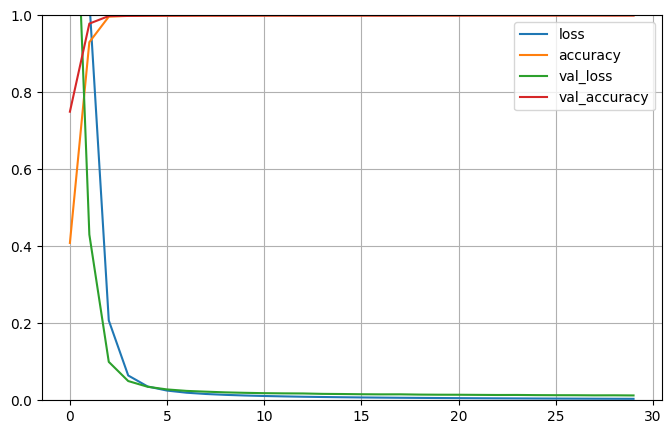

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(v)_model.h5")

In [27]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0097 - accuracy: 0.9990
test loss, test acc: [0.009681007824838161, 0.9990000128746033]


In [28]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [29]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1007    0    0    0    0    0    3    1    0    0]
 [   0 1009    0    0    0    0    1    0    0    0]
 [   0    0  993    0    0    0    0    0    0    0]
 [   1    0    0  938    0    0    0    0    0    0]
 [   0    0    0    0 1041    2    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    2 1001    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.999


Text(0.5, 1.0, 'Accuracy:0.999')

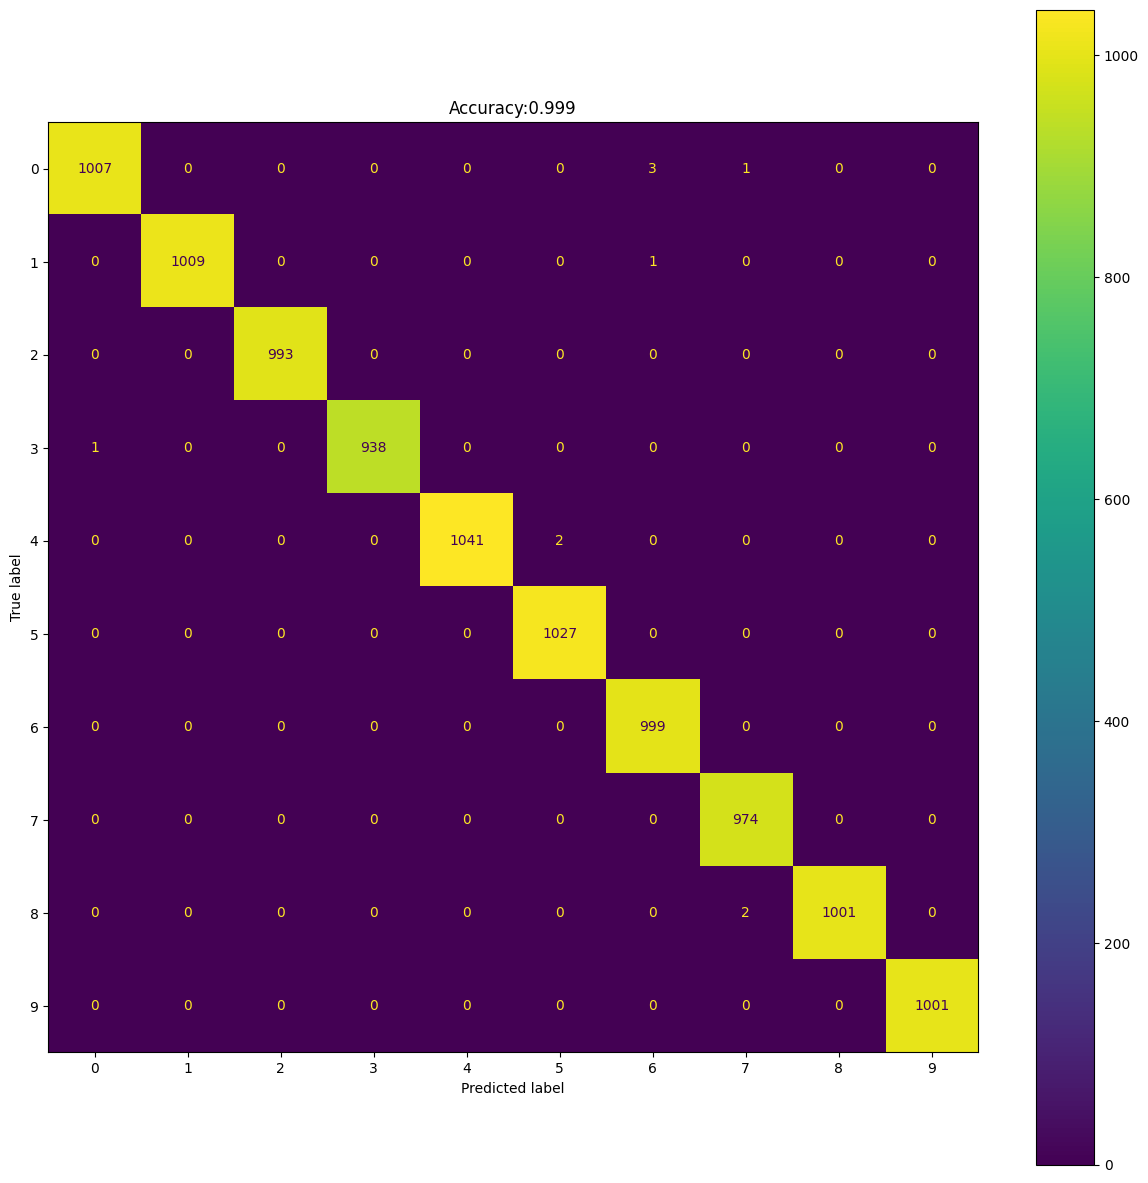

In [30]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')